In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Load our data
olist_customers_dataset = pd.read_csv(r"D:\Data Analysis\Pioneers\Final Project\Data\real_data\olist_customers_dataset.csv")

In [3]:
#Data to frame
olist_customers_dataset_df=pd.DataFrame(olist_customers_dataset)

In [4]:
olist_customers_dataset_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
# Find and Count all duplicate rows
duplicates = olist_customers_dataset_df[olist_customers_dataset_df.duplicated()]
duplicates.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state


In [7]:
#Check for misssing values
print(olist_customers_dataset_df.isnull().sum())

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


In [8]:
#How many zeros we have
zero_counts = (olist_customers_dataset_df == 0).sum()
print( zero_counts) 

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


In [142]:
olist_customers_dataset_df.to_csv("D:\Data Analysis\Pioneers\Final Project\Data\cleaned_data\olist_customers_dataset.csv")

In [44]:
olist_geolocation_dataset = pd.read_csv(r"D:\Data Analysis\Pioneers\Final Project\Data\real_data\olist_geolocation_dataset.csv")

In [45]:
#Data to frame
olist_geolocation_dataset_df=pd.DataFrame(olist_geolocation_dataset)
olist_geolocation_dataset_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [46]:
olist_geolocation_dataset_df.shape

(1000163, 5)

In [47]:
# Find and Count all duplicate rows
duplicates = olist_geolocation_dataset_df[olist_geolocation_dataset_df.duplicated()]
duplicates.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP


In [48]:
# Step 1: Get average lat/lng per zip_code
geo_avg = olist_geolocation_dataset_df.groupby("geolocation_zip_code_prefix")[["geolocation_lat", "geolocation_lng"]].mean()

# Step 2: Get first city/state per zip_code (or you can use mode if you prefer most frequent one)
geo_location_info = olist_geolocation_dataset_df.groupby("geolocation_zip_code_prefix")[["geolocation_city", "geolocation_state"]].first()

# Step 3: Combine both by joining on index (zip prefix)
olist_geolocation_dataset_df_new = geo_avg.join(geo_location_info).reset_index()

# Step 4: View the result
olist_geolocation_dataset_df_new.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1001,-23.550190,-46.634024,sao paulo,SP
1,1002,-23.548146,-46.634979,sao paulo,SP
2,1003,-23.548994,-46.635731,sao paulo,SP
3,1004,-23.549799,-46.634757,sao paulo,SP
4,1005,-23.549456,-46.636733,sao paulo,SP


In [50]:
# Refind and Recount all duplicate rows
duplicates = olist_geolocation_dataset_df_new[olist_geolocation_dataset_df_new.duplicated()]
duplicates.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state


In [51]:
olist_geolocation_dataset_df_new.shape

(19015, 5)

In [52]:
#Check for misssing values
print(olist_geolocation_dataset_df_new.isnull().sum())

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


In [53]:
#How many zeros we have
zero_counts = (olist_geolocation_dataset_df_new == 0).sum()
print( zero_counts) 

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


In [143]:
olist_geolocation_dataset_df_new.to_csv("D:\Data Analysis\Pioneers\Final Project\Data\cleaned_data\olist_geolocation_dataset.csv")

In [144]:
olist_order_items_dataset = pd.read_csv(r"D:\Data Analysis\Pioneers\Final Project\Data\real_data\olist_order_items_dataset.csv")

In [145]:
#Data to frame
olist_order_items_dataset_df=pd.DataFrame(olist_order_items_dataset)
olist_order_items_dataset_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [146]:
olist_order_items_dataset_df.shape

(112650, 7)

In [147]:
# Find and Count all duplicate rows
duplicates = olist_order_items_dataset_df[olist_order_items_dataset_df.duplicated()]
duplicates.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value


In [148]:
#Check for misssing values
print(olist_order_items_dataset_df.isnull().sum())

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


In [149]:
#How many zeros we have
zero_counts = (olist_order_items_dataset_df == 0).sum()
print( zero_counts) 

order_id                 0
order_item_id            0
product_id               0
seller_id                0
shipping_limit_date      0
price                    0
freight_value          383
dtype: int64


In [150]:
olist_order_items_dataset_df.to_csv("D:\Data Analysis\Pioneers\Final Project\Data\cleaned_data\olist_order_items_dataset.csv")

In [60]:
#keep zero freight_values to analyze them
olist_order_items_dataset_df["freight_zero_flag"] = olist_order_items_dataset_df["freight_value"] == 0.0

In [64]:
olist_order_items_dataset_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,freight_zero_flag
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,False
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,False
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,False
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,False
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,False


In [98]:
order_with_zero_freight_value=olist_order_items_dataset_df[olist_order_items_dataset_df["freight_zero_flag"] == True]
order_with_zero_freight_value.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,freight_zero_flag
114,00404fa7a687c8c44ca69d42695aae73,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-15 04:31:26,99.9,0.0,True
258,00a870c6c06346e85335524935c600c0,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-05-14 00:14:29,69.9,0.0,True
483,011c899816ea29773525bd3322dbb6aa,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-07 05:30:45,99.9,0.0,True
508,012b3f6ab7776a8ab3443a4ad7bef2e6,1,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-05-09 21:30:50,53.9,0.0,True
509,012b3f6ab7776a8ab3443a4ad7bef2e6,2,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-05-09 21:30:50,53.9,0.0,True


In [101]:
order_with_zero_freight_value.sort_values(by='seller_id', ascending=False)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,freight_zero_flag
67414,9a2176942821e355e4ff9dc4a8e96a07,1,2b4609f8948be18874494203496bc318,cc419e0650a3c5ba77189a1882b7556a,2018-08-30 16:24:11,89.90,0.0,True
102409,e884177a9732255a4b37042acf760c06,1,5a848e4ab52fd5445cdc07aab1c40e48,c826c40d7b19f62a09e2d7c5e7295ee2,2018-04-26 20:32:02,122.99,0.0,True
88637,c9501c00fae501ebb1ac842b94bbf192,1,5a848e4ab52fd5445cdc07aab1c40e48,c826c40d7b19f62a09e2d7c5e7295ee2,2018-05-03 03:51:39,122.99,0.0,True
56494,80850824446cd379f755548b967c61b9,1,81fe540cb0119e1d4ef5f191701b3cb9,bc2ac6b95e1accce9858528ee566c17e,2017-09-25 04:04:01,63.00,0.0,True
55364,7de1ba35d9d0422c7129096639f316c9,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-05-22 19:56:57,69.90,0.0,True
...,...,...,...,...,...,...,...,...
10304,179b63fcfafb80e064370a2ce74c81f7,1,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-04-23 12:30:02,53.90,0.0,True
50282,72473b65d11c21455f589854da03879a,1,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-05-02 23:51:53,53.90,0.0,True
93420,d3b13898a835b480e8ab562071435158,1,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-05-14 04:54:16,53.90,0.0,True
77972,b16d9ba816a4e2f57ca956815f71f856,1,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-05-14 04:15:31,53.90,0.0,True


In [105]:
order_with_zero_freight_value[order_with_zero_freight_value['seller_id'] == "1f50f920176fa81dab994f9023523100"]
# this seller my doing shipping for free

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,freight_zero_flag
508,012b3f6ab7776a8ab3443a4ad7bef2e6,1,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-05-09 21:30:50,53.9,0.0,True
509,012b3f6ab7776a8ab3443a4ad7bef2e6,2,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-05-09 21:30:50,53.9,0.0,True
4941,0b2d6210fb2a3be6f54add89639740ab,1,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-04-27 11:31:20,53.9,0.0,True
5970,0d8b3fb610ae4ac24891052ed60e8a2a,1,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-05-10 02:51:42,53.9,0.0,True
5971,0d8b3fb610ae4ac24891052ed60e8a2a,2,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-05-10 02:51:42,53.9,0.0,True
7401,10c5f977f4a6040c985ff432dbc1e08e,1,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-05-08 14:31:49,53.9,0.0,True
10304,179b63fcfafb80e064370a2ce74c81f7,1,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-04-23 12:30:02,53.9,0.0,True
18310,2a0fa6741aab1f723a7eeaaf58fda1e4,1,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-05-02 20:31:13,53.9,0.0,True
18311,2a0fa6741aab1f723a7eeaaf58fda1e4,2,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-05-02 20:31:13,53.9,0.0,True
18312,2a0fa6741aab1f723a7eeaaf58fda1e4,3,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-05-02 20:31:13,53.9,0.0,True


In [14]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  
    Q3 = data[column].quantile(0.75)  
    IQR = Q3 - Q1  
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

In [107]:
detect_outliers_iqr(olist_order_items_dataset_df,'price')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,freight_zero_flag
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75,False
16,0009c9a17f916a706d71784483a5d643,1,3f27ac8e699df3d300ec4a5d8c5cf0b2,fcb5ace8bcc92f75707dc0f01a27d269,2018-05-02 09:31:53,639.00,11.34,False
26,0011d82c4b53e22e84023405fb467e57,1,c389f712c4b4510bc997cee93e8b1a28,bfd27a966d91cfaafdb25d076585f0da,2018-01-29 21:51:25,289.00,26.33,False
30,00137e170939bba5a3134e2386413108,1,672e757f331900b9deea127a2a7b79fd,e59aa562b9f8076dd550fcddf0e73491,2017-11-30 06:30:55,397.00,24.65,False
39,0017afd5076e074a48f1f1a4c7bac9c5,1,fe59a1e006df3ac42bf0ceb876d70969,25c5c91f63607446a97b143d2d535d31,2017-04-24 22:25:19,809.10,44.29,False
...,...,...,...,...,...,...,...,...
112586,ffdc5e3279114c523a09296f8fd28331,1,5e70a4508abd5d19bfe7f110785294c8,328acb143b4a73aad6bee8e734f5d20d,2017-02-14 14:49:23,299.99,17.80,False
112592,ffde92ba447b33a47d1c04d203f10f41,1,a97cd00f5c1dbfbc7f0f4b6c1032253e,b347677812ea483b0f528eaf8cbc09b7,2017-11-30 14:13:18,278.00,26.70,False
112632,fff7c4452f050315db1b3f24d9df5fcd,1,dd469c03ad67e201bc2179ef077dcd48,7e93a43ef30c4f03f38b393420bc753a,2017-06-07 17:05:23,736.00,20.91,False
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,False


In [109]:
# number of outliers in price column
print(f"The number of outlier in price column {int(detect_outliers_iqr(olist_order_items_dataset_df,'price').shape[0])}")

The number of outlier in price column 8427


In [120]:
detect_outliers_iqr(olist_order_items_dataset_df,'freight_value')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,freight_zero_flag
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75,False
22,000f25f4d72195062c040b12dce9a18a,1,1c05e0964302b6cf68ca0d15f326c6ba,7c67e1448b00f6e969d365cea6b010ab,2018-03-21 11:10:11,119.99,44.40,False
39,0017afd5076e074a48f1f1a4c7bac9c5,1,fe59a1e006df3ac42bf0ceb876d70969,25c5c91f63607446a97b143d2d535d31,2017-04-24 22:25:19,809.10,44.29,False
59,00254baeb6c932b0a8aeead91fbd02b5,1,18901878788fec7ddc55e64d1ace8187,e8b4225284fbb02d16f200513f1f395d,2018-05-14 22:14:46,149.90,43.11,False
73,002b430ff89b3a24c31a1170acbbedea,1,cc47c0863559499f01b4cad750929d10,7a67c85e85bb2ce8582c35f2203ad736,2017-06-26 22:10:14,199.99,65.56,False
...,...,...,...,...,...,...,...,...
112641,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19,False
112642,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19,False
112643,fffb9224b6fc7c43ebb0904318b10b5f,4,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19,False
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,False


In [3]:
olist_order_payments_dataset = pd.read_csv(r"D:\Data Analysis\Pioneers\Final Project\Data\real_data\olist_order_payments_dataset.csv")

In [4]:
olist_order_payments_dataset_df=pd.DataFrame(olist_order_payments_dataset)
olist_order_payments_dataset_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [79]:
merged_df = pd.merge(order_with_zero_freight_value, olist_order_payments_dataset_df, on="order_id", how="inner")

In [80]:
merged_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,freight_zero_flag,payment_sequential,payment_type,payment_installments,payment_value
0,00404fa7a687c8c44ca69d42695aae73,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-15 04:31:26,99.9,0.0,True,1,boleto,1,99.9
1,00a870c6c06346e85335524935c600c0,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-05-14 00:14:29,69.9,0.0,True,1,credit_card,1,69.9
2,011c899816ea29773525bd3322dbb6aa,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-07 05:30:45,99.9,0.0,True,1,boleto,1,99.9
3,012b3f6ab7776a8ab3443a4ad7bef2e6,1,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-05-09 21:30:50,53.9,0.0,True,1,credit_card,6,107.8
4,012b3f6ab7776a8ab3443a4ad7bef2e6,2,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-05-09 21:30:50,53.9,0.0,True,1,credit_card,6,107.8
...,...,...,...,...,...,...,...,...,...,...,...,...
385,fc698f330ec7fb74859071cc6cb29772,1,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-04-25 02:31:57,53.9,0.0,True,1,boleto,1,53.9
386,fd4907109f6bac23f07064af84bec02d,1,7a10781637204d8d10485c71a6108a2e,4869f7a5dfa277a7dca6462dcf3b52b2,2018-04-30 11:31:32,219.0,0.0,True,1,credit_card,2,219.0
387,fd95e4b85ebbb81853d4a6be3d61432b,1,53b36df67ebb7c41585e8d54d6772e08,4869f7a5dfa277a7dca6462dcf3b52b2,2018-05-04 11:10:31,106.9,0.0,True,1,credit_card,2,106.9
388,fee19a0dc7358b6962a611cecf6a37b4,1,f1c7f353075ce59d8a6f3cf58f419c9c,37be5a7c751166fbc5f8ccba4119e043,2017-09-07 22:06:31,195.0,0.0,True,1,credit_card,5,195.0


In [5]:
# Find and Count all duplicate rows
duplicates = olist_order_payments_dataset_df[olist_order_payments_dataset_df.duplicated()]
duplicates.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value


In [6]:
#Check for misssing values
print(olist_order_payments_dataset_df.isnull().sum())

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


In [7]:
#How many zeros we have
zero_counts = (olist_order_payments_dataset_df == 0).sum()
print( zero_counts) 

order_id                0
payment_sequential      0
payment_type            0
payment_installments    2
payment_value           9
dtype: int64


In [8]:
olist_order_payments_dataset_df[(olist_order_payments_dataset_df == 0).any(axis=1)]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
19922,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.00
36822,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.00
43744,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.00
46982,744bade1fcf9ff3f31d860ace076d422,2,credit_card,0,58.69
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.00
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.00
62674,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.00
77885,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.00
79014,1a57108394169c0b47d8f876acc9ba2d,2,credit_card,0,129.94
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.00


In [9]:
olist_order_payments_dataset_df[olist_order_payments_dataset_df['order_id' ]== "744bade1fcf9ff3f31d860ace076d422"]


,order_id,payment_sequential,payment_type,payment_installments,payment_value
46982,744bade1fcf9ff3f31d860ace076d422,2,credit_card,0,58.69


In [10]:
# replace zeros with ones in payment_installments
olist_order_payments_dataset_df['payment_installments'] = olist_order_payments_dataset_df['payment_installments'].replace(0, 1)


In [11]:
#How many zeros we have
zero_counts = (olist_order_payments_dataset_df == 0).sum()
print( zero_counts) 

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           9
dtype: int64


In [15]:
detect_outliers_iqr(olist_order_payments_dataset_df,'payment_value')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
23,4d680edbaa7d3d9bed69532957368a03,1,credit_card,10,353.09
26,d0a945f85ba1074b60aac97ade7e240e,1,credit_card,2,541.00
52,2e2c60b99754ae1e4d8b18846cfec9f2,1,credit_card,4,542.66
54,95442deb81a5d91c97c0df96b431634a,1,boleto,1,368.98
61,3ab4eea6776259ae8dfbabaeffece352,1,credit_card,8,387.80
...,...,...,...,...,...
103814,df8ab61cb615d551483618533aceb364,1,credit_card,10,713.65
103843,262bf694d9c87de7844dd80b98fcfef3,1,credit_card,5,372.08
103861,691688405bcee3ff9023639514498962,1,credit_card,1,356.53
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31


In [16]:
olist_order_payments_dataset_df.to_csv("D:\Data Analysis\Pioneers\Final Project\Data\cleaned_data\olist_order_payments_dataset.csv")

In [17]:
olist_order_reviews_dataset = pd.read_csv(r"D:\Data Analysis\Pioneers\Final Project\Data\real_data\olist_order_reviews_dataset.csv")

In [18]:
#Data to frame
olist_order_reviews_dataset_df=pd.DataFrame(olist_order_reviews_dataset)
olist_order_reviews_dataset_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [115]:
merged_df = pd.merge(
    olist_order_items_dataset_df,
    olist_products_dataset_df,
    on='product_id',
    how='left'
)

In [117]:
merged_df[['price','product_category_name']]

,price,product_category_name
0,58.90,cool_stuff
1,239.90,pet_shop
2,199.00,moveis_decoracao
3,12.99,perfumaria
4,199.90,ferramentas_jardim
...,...,...
112645,299.99,utilidades_domesticas
112646,350.00,informatica_acessorios
112647,99.90,esporte_lazer
112648,55.99,informatica_acessorios


In [123]:
while True:
    outliers = detect_outliers_iqr(merged_df, 'price')
    if outliers.empty:
        break
    print(outliers[['product_category_name', 'price']])

            product_category_name   price
7              ferramentas_jardim  810.00
16                 consoles_games  639.00
26               malas_acessorios  289.00
30      agro_industria_e_comercio  397.00
39         informatica_acessorios  809.10
...                           ...     ...
112586     informatica_acessorios  299.99
112592      utilidades_domesticas  278.00
112632         relogios_presentes  736.00
112645      utilidades_domesticas  299.99
112646     informatica_acessorios  350.00

[8427 rows x 2 columns]
            product_category_name   price
7              ferramentas_jardim  810.00
16                 consoles_games  639.00
26               malas_acessorios  289.00
30      agro_industria_e_comercio  397.00
39         informatica_acessorios  809.10
...                           ...     ...
112586     informatica_acessorios  299.99
112592      utilidades_domesticas  278.00
112632         relogios_presentes  736.00
112645      utilidades_domesticas  299.99
112646   

KeyboardInterrupt: 

In [125]:
olist_order_reviews_dataset_df[['review_score']].min()

review_score    1
dtype: int64

In [126]:
olist_order_reviews_dataset_df[['review_score']].max()

review_score    5
dtype: int64

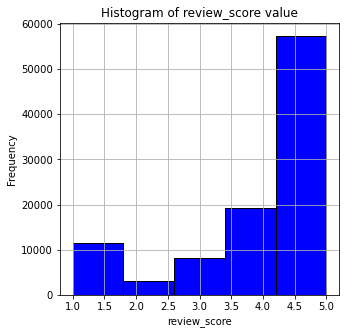

In [128]:
# Create a histogram
olist_order_reviews_dataset_df['review_score'].hist(bins=5, figsize=(5, 5), color='blue', edgecolor='black')

# Labels and Title
plt.xlabel('review_score')
plt.ylabel('Frequency')
plt.title('Histogram of review_score value')

# Show the plot
plt.show()

In [20]:
olist_order_reviews_dataset_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [21]:
olist_order_reviews_dataset_df = olist_order_reviews_dataset_df[["review_id" , "order_id" , "review_score"]]

In [22]:
olist_order_reviews_dataset_df.to_csv("D:\Data Analysis\Pioneers\Final Project\Data\cleaned_data\olist_order_reviews_dataset_df.csv")

In [23]:
olist_orders_dataset = pd.read_csv(r"D:\Data Analysis\Pioneers\Final Project\Data\real_data\olist_orders_dataset.csv")

In [24]:
olist_orders_dataset_df = pd.DataFrame(olist_orders_dataset)
olist_orders_dataset_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [25]:
olist_orders_dataset_df[olist_orders_dataset_df["order_status"] == "approved"]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
44897,a2e4c44360b4a57bdff22f3a4630c173,8886130db0ea6e9e70ba0b03d7c0d286,approved,2017-02-06 20:18:17,2017-02-06 20:30:19,NaN,NaN,2017-03-01 00:00:00
88457,132f1e724165a07f6362532bfb97486e,b2191912d8ad6eac2e4dc3b6e1459515,approved,2017-04-25 01:25:34,2017-04-30 20:32:41,NaN,NaN,2017-05-22 00:00:00


In [26]:
olist_orders_dataset.to_csv("D:\Data Analysis\Pioneers\Final Project\Data\cleaned_data\olist_orders_dataset.csv")

In [27]:
olist_products_dataset = pd.read_csv(r"D:\Data Analysis\Pioneers\Final Project\Data\real_data\olist_products_dataset.csv")

In [28]:
olist_products_dataset_df = pd.DataFrame(olist_products_dataset)
olist_products_dataset_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [29]:
# Find and Count all duplicate rows
duplicates = olist_products_dataset_df[olist_products_dataset_df.duplicated()]
duplicates.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm


In [30]:
olist_products_dataset_df = olist_products_dataset_df[["product_id","product_category_name"]]

In [31]:
olist_products_dataset_df.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas


In [32]:
olist_products_dataset_df.to_csv("D:\Data Analysis\Pioneers\Final Project\Data\cleaned_data\olist_products_dataset.csv")

In [33]:
olist_sellers_dataset = pd.read_csv(r"D:\Data Analysis\Pioneers\Final Project\Data\real_data\olist_sellers_dataset.csv")

In [34]:
olist_sellers_dataset_df = pd.DataFrame(olist_sellers_dataset)
olist_sellers_dataset_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [35]:
# Find and Count all duplicate rows
duplicates = olist_sellers_dataset_df[olist_sellers_dataset_df.duplicated()]
duplicates.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state


In [36]:
#Check for misssing values
print(olist_sellers_dataset_df.isnull().sum())


seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64


In [37]:

#How many zeros we have
zero_counts = (olist_sellers_dataset_df == 0).sum()
print( zero_counts) 

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64


In [38]:
olist_sellers_dataset_df.to_csv("D:\Data Analysis\Pioneers\Final Project\Data\cleaned_data\olist_sellers_dataset.csv")